# <center><font color='#000000'>Exploring Temperature Patterns and Clustering Analysis<font><a class='anchor' id='top'></a></center>

### Table of Contents
    
* [1. Introduction](#chapter1)

* [2. Data Health Review](#chapter2)
	* [2.1 Importing Libraries](#chapter2.1)
	* [2.2 Importing the Data](#chapter2.2)
	* [2.3 Data Cleaning and Preprocessing](#chapter2.3)
	
* [3. KMeans Clustering algorithm](#chapter3)

* [4. Evaluating Clustering Performance Using Metrics](#chapter4)

* [5. Conclusion](#chapter5)

## 1  Introduction  <a class="anchor" id="chapter1"></a>

Temperature variations have a significant impact on our daily lives, both indoors and outdoors. Understanding the factors influencing temperature fluctuations is essential for creating comfortable living environments. In this study, we explore temperature patterns using real-world data and apply K-means clustering analysis to identify distinct temperature clusters. Our aim is to gain insights into the relationship between indoor and outdoor temperatures and uncover valuable information regarding temperature dynamics.

**Data Preprocessing:**

To begin, we import the necessary libraries and load the dataset. The data is then cleaned and preprocessed for further analysis. Columns are appropriately renamed, and a new column is added to represent the month name. Numerical columns are converted to the desired data type, ensuring accurate calculations and analysis.

Exploring Relevance of the Day of the Week:
Next, we focus on the relevance of the day of the week in relation to mean outside and inside temperatures. By analyzing this relationship, we gain insights into how temperature patterns vary across different days of the week. This analysis helps us understand the influence of factors such as weekdays, weekends, and seasonal variations on temperature fluctuations.

Filtering and Focusing on a Specific Location:
To streamline our analysis, we narrow down our dataset to a specific location. In this case, we focus on the Madhapur area. By isolating the data for this location, we remove redundancy and ensure that our analysis is specific to the given area of interest.

**K-means Clustering:**

To identify meaningful temperature clusters, we apply K-means clustering analysis to the dataset. Specifically, we focus on two numerical fields: outside temperature and inside temperature. Before clustering, we scale the data using the standard scaler to ensure fair and accurate comparison.

Determining Optimal Number of Clusters:
Using the elbow diagram, we visualize the within-cluster sum of squares (WCSS) for different numbers of clusters. The elbow diagram helps us identify the optimal number of clusters that strikes a balance between capturing meaningful structure and avoiding excessive complexity. We select the number of clusters based on the point on the elbow plot where the improvement in WCSS becomes marginal.

Cluster Analysis and Centroid Visualization:
After determining the optimal number of clusters, we apply K-means clustering to classify the centroids. We assess the scores and metrics to evaluate the quality of the clustering. In this analysis, we find that cluster 2 exhibits the best-suited score.

**Interpreting Cluster Results:**

Analyzing the findings, we observe that the most frequently observed outdoor temperature cluster has an average ranging from 29.45°C to 32.58°C. In comparison, the indoor temperature cluster averages between 29.09°C and 32.51°C. These insights provide valuable information regarding temperature ranges in Madhapur, highlighting the differences between indoor and outdoor environments.

**Conclusion:**

This study highlights the relevance of temperature patterns and the impact of factors such as location, day of the week, and seasonal variations. By applying K-means clustering analysis, we gain insights into distinct temperature clusters and uncover valuable information regarding temperature dynamics. The findings contribute to our understanding of temperature fluctuations and provide useful knowledge for creating comfortable living and working environments.

## 2. Data Health Review <a class = "anchor" id = "chapter2"> </a>

### 2.1 Importing Libraries <a class = "anchor" id = "chapter2.1"> </a>

In [9]:
import pandas as pd
import numpy as np

#statistics

import matplotlib.pyplot as plt
import seaborn as sns

#

## 2.2 Importing the Data <a class = "anchor" id = "chapter2.2"></a>

In [13]:
df = pd.read_excel('Difference_In_Air_Temperature.xlsx')
df.head(3)

,DATE,INSIDE TEMPERATURE,OUTSIDE TEMPERATURE,NIGHT TEMPERATURE,Unnamed: 4,LOCATION
0,2023-03-13,31.6˚C,35.0˚C,NaN,NaN,MADHAPUR
1,2023-03-14,30.3˚C,30.2˚C,NaN,NaN,MADHAPUR
2,2023-03-15,31.1˚C,30.3˚C,NaN,NaN,MADHAPUR


## 2.3 Data Cleaning and Preprocessing <a class= "anchor" id = "chapter2.3"></a>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0        DATE            53 non-null     datetime64[ns]
 1   INSIDE TEMPERATURE   53 non-null     object        
 2   OUTSIDE TEMPERATURE  53 non-null     object        
 3   NIGHT TEMPERATURE    12 non-null     object        
 4   Unnamed: 4           12 non-null     object        
 5      LOCATION          53 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.6+ KB


In [15]:
df.columns

Index(['     DATE', 'INSIDE TEMPERATURE', 'OUTSIDE TEMPERATURE',
       'NIGHT TEMPERATURE', 'Unnamed: 4', '   LOCATION'],
      dtype='object')

#### Renaming the Columns

In [16]:
df.rename(columns = {'     DATE':'Date','INSIDE TEMPERATURE':'InsideAirTemp','OUTSIDE TEMPERATURE':'OutsideAirTemp', '   LOCATION':'Location'}, inplace = True)
df.columns

Index(['Date', 'InsideAirTemp', 'OutsideAirTemp', 'NIGHT TEMPERATURE',
       'Unnamed: 4', 'Location'],
      dtype='object')

In [17]:
df.head()

,Date,InsideAirTemp,OutsideAirTemp,NIGHT TEMPERATURE,Unnamed: 4,Location
0,2023-03-13,31.6˚C,35.0˚C,NaN,NaN,MADHAPUR
1,2023-03-14,30.3˚C,30.2˚C,NaN,NaN,MADHAPUR
2,2023-03-15,31.1˚C,30.3˚C,NaN,NaN,MADHAPUR
3,2023-03-16,26.1˚C,28.8˚C,NaN,NaN,MADHAPUR
4,2023-03-17,28.0˚C,28.2˚C,NaN,NaN,MADHAPUR


#### Adding Month Name column

In [18]:

# df['Date'] = pd.to_datetime(df['Date'])

# "%B" mrepresents month
df['Month_name'] = df['Date'].dt.strftime("%B") # this percentage is the formula we use to dapat kan MARCH instead of /03/
df['Month_name'].head(4)

0    March
1    March
2    March
3    March
Name: Month_name, dtype: object

In [19]:
df.columns

Index(['Date', 'InsideAirTemp', 'OutsideAirTemp', 'NIGHT TEMPERATURE',
       'Unnamed: 4', 'Location', 'Month_name'],
      dtype='object')

In [20]:
df['Location'].value_counts()

Location
MADHAPUR    41
KHAMMAM     12
Name: count, dtype: int64

#### Changing the data type of numerical number

In [21]:
df['InsideAirTemp'] = df['InsideAirTemp'].str.replace('˚C','').astype(float)
df['OutsideAirTemp'] = df['OutsideAirTemp'].str.replace('˚C','').astype(float)

In [16]:
df.head()

,Date,InsideAirTemp,OutsideAirTemp,NIGHT TEMPERATURE,Unnamed: 4,Location,Month_name
0,2023-03-13,31.6,35.0,NaN,NaN,MADHAPUR,March
1,2023-03-14,30.3,30.2,NaN,NaN,MADHAPUR,March
2,2023-03-15,31.1,30.3,NaN,NaN,MADHAPUR,March
3,2023-03-16,26.1,28.8,NaN,NaN,MADHAPUR,March
4,2023-03-17,28.0,28.2,NaN,NaN,MADHAPUR,March


#### Taking the data of only one location feature 

In [22]:
df_Madhapur = df[df['Location'] == 'MADHAPUR'] #filtering to get only one location they want
df_Madhapur['DayOfWeek'] = df_Madhapur['Date'].dt.day_name()
df_Madhapur.head()

/var/folders/s8/tbxv343x1ps3tk0c9zlx32780000gn/T/ipykernel_2622/1345749483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Madhapur['DayOfWeek'] = df_Madhapur['Date'].dt.day_name()


,Date,InsideAirTemp,OutsideAirTemp,NIGHT TEMPERATURE,Unnamed: 4,Location,Month_name,DayOfWeek
0,2023-03-13,31.6,35.0,NaN,NaN,MADHAPUR,March,Monday
1,2023-03-14,30.3,30.2,NaN,NaN,MADHAPUR,March,Tuesday
2,2023-03-15,31.1,30.3,NaN,NaN,MADHAPUR,March,Wednesday
3,2023-03-16,26.1,28.8,NaN,NaN,MADHAPUR,March,Thursday
4,2023-03-17,28.0,28.2,NaN,NaN,MADHAPUR,March,Friday


#### Find out the relevance of the day of the week in mean outside and inside temperature

In [26]:
df_Madhapur.groupby('DayOfWeek').mean()

TypeError: Could not convert MADHAPURMADHAPURMADHAPURMADHAPURMADHAPURMADHAPUR to numeric

In [27]:
df_Madhapur = df_Madhapur.iloc[:, [0,1,2,5,]] # but in this column are the columns you want to include # alternatively use drop.info to drop
df_Madhapur.head(4)

IndexError: positional indexers are out-of-bounds

In [29]:
df_Madhapur.head(5) #clean data

,Date,InsideAirTemp,OutsideAirTemp,Location,Month_name,DayOfWeek
0,2023-03-13,31.6,35.0,MADHAPUR,March,Monday
1,2023-03-14,30.3,30.2,MADHAPUR,March,Tuesday
2,2023-03-15,31.1,30.3,MADHAPUR,March,Wednesday
3,2023-03-16,26.1,28.8,MADHAPUR,March,Thursday
4,2023-03-17,28.0,28.2,MADHAPUR,March,Friday


#### taking the data of only madhapur and removing redundent data

In [30]:
df_Madhapur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            41 non-null     datetime64[ns]
 1   InsideAirTemp   41 non-null     float64       
 2   OutsideAirTemp  41 non-null     float64       
 3   Location        41 non-null     object        
 4   Month_name      41 non-null     object        
 5   DayOfWeek       41 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 2.2+ KB


In [31]:
df_Madhapur.shape

(41, 6)

## 3. KMeans Clustering algorithm <a class = "anchor" id = "chapter3"> </a>

#### Applying KMeans for only two numerical fields ie  which is outside temperature and Inside temperature

In [32]:
df_Madhapur_Cont = df_Madhapur[['InsideAirTemp', 'OutsideAirTemp']]
df_Madhapur_Cont.head(3)

,InsideAirTemp,OutsideAirTemp
0,31.6,35.0
1,30.3,30.2
2,31.1,30.3


#### Scaling the data through standard scaler 

In [33]:
# Scaling the Data Frame

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss = ss.fit_transform(df_Madhapur_Cont)


#### Applying KMeans Clustering to find the best suited classification of centroids

In [34]:
# using Clustering

from sklearn.cluster import KMeans

WSS = [] # inter cluster distance

for i in range(1,15):
    m = KMeans(n_clusters = i) # i ni berapa yg kita dapat nnti
    m = m.fit(ss)
    WSS.append(m.inertia_)
    
WSS

/Users/eezahkamal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/eezahkamal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/eezahkamal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/eezahkamal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

[82.00000000000001,
 29.51416342886542,
 13.818237484692261,
 9.60168187294848,
 7.162125187353708,
 5.647279859521788,
 4.459291472293609,
 3.5609258655060145,
 2.8352967511288822,
 2.1181514921539772,
 1.592915523791899,
 1.3124919116160507,
 1.1299040681019805,
 0.9929020657275294]

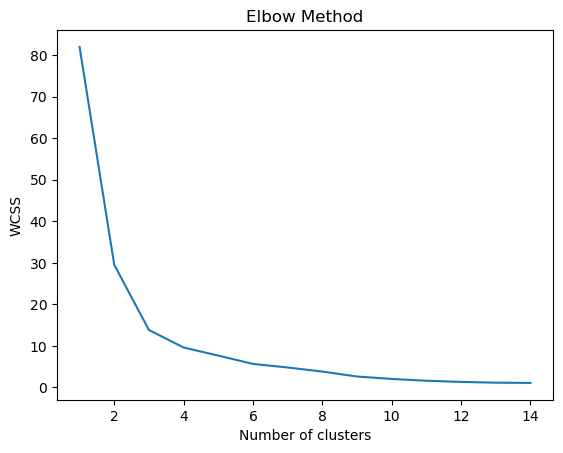

In [42]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(ss)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 15), wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
#Fit K-Means to the data with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(ss)

# Add the cluster labels to the DataFrame
df_Madhapur['Cluster'] = clusters # which group data entry is in

# Create separate dataframes for each cluster . this is for loops?
cluster_dataframes = [df_Madhapur[df_Madhapur['Cluster'] == i] for i in range(3)] #make sure range is the ideal cluster which is 3

In [48]:
cluster_dataframes

[         Date  InsideAirTemp  OutsideAirTemp  Location Month_name  DayOfWeek  \
 1  2023-03-14           30.3            30.2  MADHAPUR      March    Tuesday   
 2  2023-03-15           31.1            30.3  MADHAPUR      March  Wednesday   
 11 2023-03-24           30.5            30.9  MADHAPUR      March     Friday   
 12 2023-03-25           30.7            30.6  MADHAPUR      March   Saturday   
 13 2023-03-26           30.2            30.6  MADHAPUR      March     Sunday   
 14 2023-03-27           30.2            31.2  MADHAPUR      March     Monday   
 15 2023-03-28           31.3            31.6  MADHAPUR      March    Tuesday   
 17 2023-03-30           31.8            32.7  MADHAPUR      March   Thursday   
 18 2023-03-31           31.7            32.1  MADHAPUR      March     Friday   
 19 2023-04-01           31.4            32.1  MADHAPUR      April   Saturday   
 20 2023-04-02           31.7            31.3  MADHAPUR      April     Sunday   
 21 2023-04-03           31.

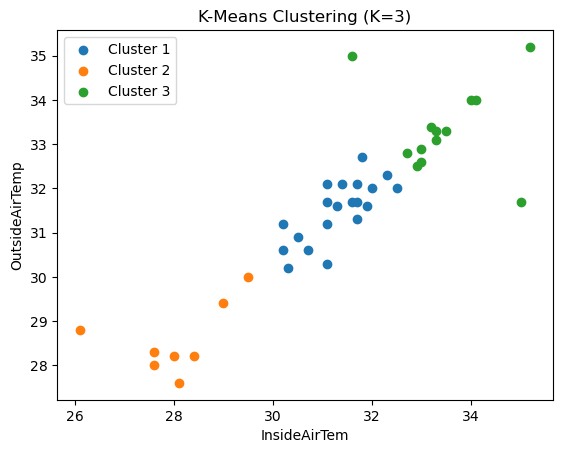

In [49]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['InsideAirTemp'], cluster_df['OutsideAirTemp'], label=f'Cluster {i + 1}')
                #x axis            #y axis
plt.xlabel('InsideAirTem')
plt.ylabel('OutsideAirTemp')
plt.title('K-Means Clustering (K=3)')
plt.legend()
plt.show()

# Cluster - Stroke

In [72]:
stroke = pd.read_csv('stroke.csv')
stroke.head()
stroke.info()
stroke.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   int64  
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   int64  
 5   work_type          1136 non-null   int64  
 6   Residence_type     1136 non-null   int64  
 7   avg_glucose_level  1136 non-null   float64
 8   bmi                1084 non-null   float64
 9   smoking_status     1136 non-null   int64  
 10  stroke             1136 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 97.8 KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1131,2,1,0,0,2,1,1,110.17,20.3,2,0
1132,1,6,0,0,2,1,1,92.98,18.9,2,0
1133,1,81,0,0,1,2,2,234.35,25.3,3,0
1134,2,81,1,0,1,2,1,80.43,29.7,4,1


#### Using Elbow Diagram to visualise the Within Sum of Squares

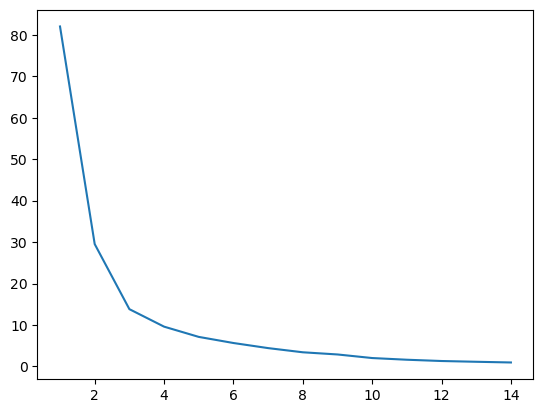

In [23]:
plt.plot(range(1,15),WSS)

#### Finding the least suitable number of centroids

In [24]:
diff_WSS = []

for i in range(0,10):
    diff_WSS.append(WSS[i]-WSS[i+1])
    
diff_WSS

[52.4858365711346,
 15.695925944173158,
 4.216555611743782,
 2.4740245014252604,
 1.4735622333810268,
 1.2292714816790715,
 1.0076309966675505,
 0.5252359683620784,
 0.8634168721904265,
 0.4080468300368234]

## 4. Evaluating Clustering Performance Using Metrics <a class = "anchor" id = "chapter4"></a>

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2,9):
    KM = KMeans(n_clusters = i,random_state = 1)
    KM.fit(ss)
    labels = KM.labels_
    print(silhouette_score(ss,labels, random_state = 1))

0.5373798887841814
0.5232671055784323
0.4907736853575556
0.4878607372178935
0.5032213985944807
0.5035410831331094
0.46675662326717265


/Users/salinianbalagan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salinianbalagan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salinianbalagan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salinianbalagan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

#### Best suited score is cluster 2

In [26]:
mod2 = KMeans(n_clusters = 2)
mod2 = mod2.fit(ss)

df_Madhapur['Clusters'] = mod2.labels_

df_Madhapur.head()

/Users/salinianbalagan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/rp/vz2nm08n6w53827hsntk004r0000gn/T/ipykernel_12605/3607326254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Madhapur['Clusters'] = mod2.labels_


,Date,InsideAirTemp,OutsideAirTemp,Location,Month_name,DayOfWeek,Clusters
0,2023-03-13,31.6,35.0,MADHAPUR,March,Monday,1
1,2023-03-14,30.3,30.2,MADHAPUR,March,Tuesday,0
2,2023-03-15,31.1,30.3,MADHAPUR,March,Wednesday,0
3,2023-03-16,26.1,28.8,MADHAPUR,March,Thursday,0
4,2023-03-17,28.0,28.2,MADHAPUR,March,Friday,0


#### Finding the location of Centroids and visualising it

In [27]:
# Coordinates of Centroids

centroids = mod2.cluster_centers_
centroids

array([[-1.10153796, -1.12047315],
       [ 0.57116783,  0.58098608]])

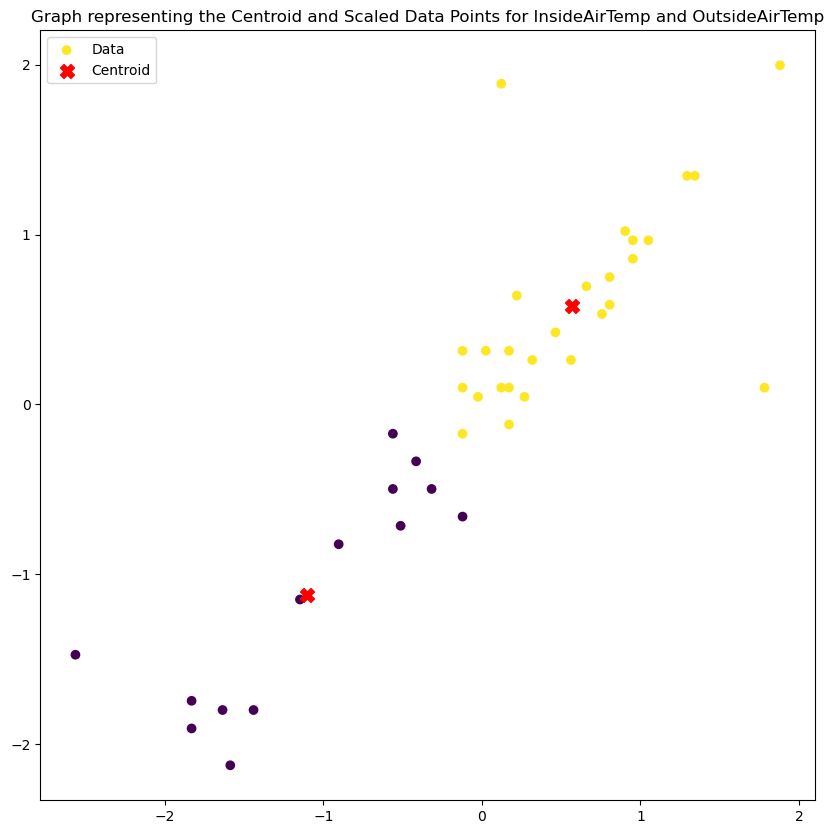

In [28]:
plt.figure(figsize = (10,10))

plt.scatter (ss[:, 0], ss[:, 1], c =  df_Madhapur['Clusters'], cmap = 'viridis')

plt.scatter(centroids[:,0], centroids [:,1], marker = 'X', s = 100, c = 'red', label = 'Centroids')

plt.legend(['Data', 'Centroid'])
plt.title('Graph representing the Centroid and Scaled Data Points for InsideAirTemp and OutsideAirTemp')
plt.show()

#### Finding the values of Centroids of clusters in real Data

In [29]:
mod2 = KMeans(n_clusters = 2)
mod2 = mod2.fit(df_Madhapur_Cont)
mod2

/Users/salinianbalagan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [30]:
mod2.cluster_centers_

array([[29.09285714, 29.45      ],
       [32.51851852, 32.58888889]])

## 5. Conclusion <a class = "anchor" id = "chapter5"></a>

#### The findings revealed that the most frequently observed outdoor temperature cluster exhibited an average of 32.58°C on the higher end and 29.45°C on the lower end. In comparison, the indoor temperature cluster had an average of 32.51°C on the higher end and 29.09°C on the lower end.